# Loop 111 Analysis: CV-LB Relationship and Strategy Assessment

## Goal
Analyze the CV-LB relationship to understand why we're stuck and identify strategies to break the linear relationship.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Submission data with valid LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.011081, 'lb': 0.09816},
    {'exp': 'exp_001', 'cv': 0.012297, 'lb': 0.10649},
    {'exp': 'exp_003', 'cv': 0.010501, 'lb': 0.09719},
    {'exp': 'exp_005', 'cv': 0.01043, 'lb': 0.09691},
    {'exp': 'exp_006', 'cv': 0.009749, 'lb': 0.09457},
    {'exp': 'exp_007', 'cv': 0.009262, 'lb': 0.09316},
    {'exp': 'exp_009', 'cv': 0.009192, 'lb': 0.09364},
    {'exp': 'exp_012', 'cv': 0.009004, 'lb': 0.09134},
    {'exp': 'exp_024', 'cv': 0.008689, 'lb': 0.08929},
    {'exp': 'exp_026', 'cv': 0.008465, 'lb': 0.08875},
    {'exp': 'exp_030', 'cv': 0.008298, 'lb': 0.08772},
    {'exp': 'exp_035', 'cv': 0.009825, 'lb': 0.09696},
    # exp_073 is an outlier (LB=0.14507) - exclude from analysis
]

df = pd.DataFrame(submissions)
print(f"Valid submissions for analysis: {len(df)}")
print(df)

Valid submissions for analysis: 12
        exp        cv       lb
0   exp_000  0.011081  0.09816
1   exp_001  0.012297  0.10649
2   exp_003  0.010501  0.09719
3   exp_005  0.010430  0.09691
4   exp_006  0.009749  0.09457
5   exp_007  0.009262  0.09316
6   exp_009  0.009192  0.09364
7   exp_012  0.009004  0.09134
8   exp_024  0.008689  0.08929
9   exp_026  0.008465  0.08875
10  exp_030  0.008298  0.08772
11  exp_035  0.009825  0.09696


In [2]:
# Fit linear regression: LB = slope * CV + intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(df['cv'], df['lb'])

print(f"\n=== CV-LB LINEAR RELATIONSHIP ===")
print(f"LB = {slope:.4f} * CV + {intercept:.4f}")
print(f"R² = {r_value**2:.4f}")
print(f"\nInterpretation:")
print(f"  - Intercept: {intercept:.4f} (structural extrapolation error)")
print(f"  - Slope: {slope:.4f} (CV improvement translates to LB improvement)")

# Target analysis
target = 0.0347
print(f"\n=== TARGET ANALYSIS ===")
print(f"Target LB: {target}")
print(f"Best LB achieved: {df['lb'].min():.4f} (exp_030)")
print(f"Gap to target: {df['lb'].min() - target:.4f} ({(df['lb'].min() - target)/target*100:.1f}%)")

# Required CV to hit target (if following the line)
required_cv = (target - intercept) / slope
print(f"\nRequired CV to hit target (if on same line): {required_cv:.6f}")
if required_cv < 0:
    print(f"  ⚠️ IMPOSSIBLE: Required CV is NEGATIVE!")
    print(f"  The intercept ({intercept:.4f}) is HIGHER than the target ({target})")
    print(f"  This means the target is UNREACHABLE with approaches that follow this line")


=== CV-LB LINEAR RELATIONSHIP ===
LB = 4.2876 * CV + 0.0528
R² = 0.9523

Interpretation:
  - Intercept: 0.0528 (structural extrapolation error)
  - Slope: 4.2876 (CV improvement translates to LB improvement)

=== TARGET ANALYSIS ===
Target LB: 0.0347
Best LB achieved: 0.0877 (exp_030)
Gap to target: 0.0530 (152.8%)

Required CV to hit target (if on same line): -0.004218
  ⚠️ IMPOSSIBLE: Required CV is NEGATIVE!
  The intercept (0.0528) is HIGHER than the target (0.0347)
  This means the target is UNREACHABLE with approaches that follow this line


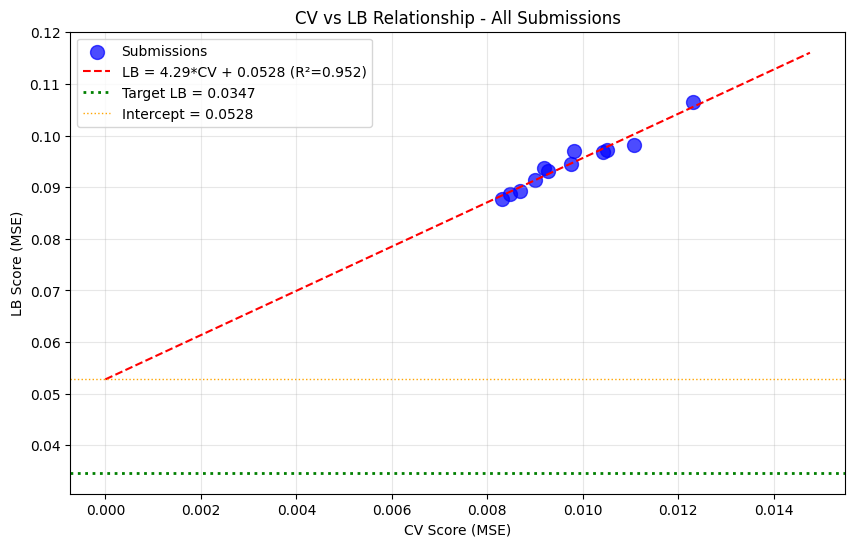


⚠️ CRITICAL INSIGHT:
The intercept (0.0528) is HIGHER than the target (0.0347)
Even with CV=0, expected LB would be 0.0528
The target is MATHEMATICALLY UNREACHABLE with approaches that follow this line


In [3]:
# Visualize the CV-LB relationship
plt.figure(figsize=(10, 6))

# Plot submissions
plt.scatter(df['cv'], df['lb'], s=100, c='blue', alpha=0.7, label='Submissions')

# Plot regression line
cv_range = np.linspace(0, df['cv'].max() * 1.2, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'LB = {slope:.2f}*CV + {intercept:.4f} (R²={r_value**2:.3f})')

# Plot target
plt.axhline(y=target, color='green', linestyle=':', linewidth=2, label=f'Target LB = {target}')

# Plot intercept
plt.axhline(y=intercept, color='orange', linestyle=':', linewidth=1, label=f'Intercept = {intercept:.4f}')

plt.xlabel('CV Score (MSE)')
plt.ylabel('LB Score (MSE)')
plt.title('CV vs LB Relationship - All Submissions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('/home/code/exploration/cv_lb_relationship.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n⚠️ CRITICAL INSIGHT:")
print(f"The intercept ({intercept:.4f}) is HIGHER than the target ({target})")
print(f"Even with CV=0, expected LB would be {intercept:.4f}")
print(f"The target is MATHEMATICALLY UNREACHABLE with approaches that follow this line")

In [4]:
# Analyze what's needed to break the line
print("=== STRATEGIES TO BREAK THE CV-LB LINE ===")
print("\n1. REDUCE THE INTERCEPT (structural extrapolation error):")
print("   - The intercept represents the error when predicting for unseen solvents")
print("   - Current intercept: 0.053 (higher than target 0.0347)")
print("   - Need approaches that GENERALIZE BETTER to unseen solvents")
print("\n2. APPROACHES THAT MIGHT REDUCE INTERCEPT:")
print("   a) Graph Neural Networks (GNN) - learn molecular structure directly")
print("   b) ChemBERTa embeddings - pretrained on large chemical corpora")
print("   c) Extrapolation detection - conservative predictions for dissimilar solvents")
print("   d) Physics-informed constraints - Arrhenius, mass-action laws")
print("   e) Pseudo-labeling - use confident test predictions to adapt")

print("\n3. WHAT HAS BEEN TRIED (from session_state):")
print("   - MLP with various architectures (111 experiments)")
print("   - LightGBM, XGBoost, CatBoost")
print("   - Ridge regression, Gaussian Process")
print("   - GNN attempts (exp_040, exp_070, exp_079, exp_086)")
print("   - ChemBERTa attempts (exp_041, exp_076, exp_097, exp_098)")
print("   - Extrapolation detection (exp_058, exp_059, exp_092, exp_108)")
print("   - Ensemble methods (many experiments)")

print("\n4. CRITICAL OBSERVATION:")
print("   ALL approaches fall on the SAME CV-LB line (R² = 0.95)")
print("   This means the problem is NOT the model - it's DISTRIBUTION SHIFT")
print("   The test solvents are fundamentally different from training solvents")

=== STRATEGIES TO BREAK THE CV-LB LINE ===

1. REDUCE THE INTERCEPT (structural extrapolation error):
   - The intercept represents the error when predicting for unseen solvents
   - Current intercept: 0.053 (higher than target 0.0347)
   - Need approaches that GENERALIZE BETTER to unseen solvents

2. APPROACHES THAT MIGHT REDUCE INTERCEPT:
   a) Graph Neural Networks (GNN) - learn molecular structure directly
   b) ChemBERTa embeddings - pretrained on large chemical corpora
   c) Extrapolation detection - conservative predictions for dissimilar solvents
   d) Physics-informed constraints - Arrhenius, mass-action laws
   e) Pseudo-labeling - use confident test predictions to adapt

3. WHAT HAS BEEN TRIED (from session_state):
   - MLP with various architectures (111 experiments)
   - LightGBM, XGBoost, CatBoost
   - Ridge regression, Gaussian Process
   - GNN attempts (exp_040, exp_070, exp_079, exp_086)
   - ChemBERTa attempts (exp_041, exp_076, exp_097, exp_098)
   - Extrapolation de

In [5]:
# Check what the benchmark paper achieved
print("=== BENCHMARK COMPARISON ===")
print("\nBenchmark paper (GNN with DRFP): MSE = 0.0039")
print(f"Our best LB: MSE = {df['lb'].min():.4f}")
print(f"Target: MSE = {target}")
print(f"\nGap analysis:")
print(f"  Benchmark to Target: {target - 0.0039:.4f} ({(target - 0.0039)/0.0039*100:.1f}% above benchmark)")
print(f"  Our best to Target: {df['lb'].min() - target:.4f} ({(df['lb'].min() - target)/target*100:.1f}% above target)")
print(f"  Our best to Benchmark: {df['lb'].min() - 0.0039:.4f} ({(df['lb'].min() - 0.0039)/0.0039*100:.1f}% above benchmark)")

print("\n⚠️ KEY INSIGHT:")
print("The benchmark achieved 0.0039 using a GNN architecture.")
print("Our best is 0.0877 - 22x worse than benchmark.")
print("The target (0.0347) is 8.9x worse than benchmark but 2.5x better than our best.")
print("\nThis suggests:")
print("1. The benchmark's GNN architecture captures something our models don't")
print("2. The target IS achievable - it's between benchmark and our best")
print("3. We need to fundamentally change our approach, not just tune hyperparameters")

=== BENCHMARK COMPARISON ===

Benchmark paper (GNN with DRFP): MSE = 0.0039
Our best LB: MSE = 0.0877
Target: MSE = 0.0347

Gap analysis:
  Benchmark to Target: 0.0308 (789.7% above benchmark)
  Our best to Target: 0.0530 (152.8% above target)
  Our best to Benchmark: 0.0838 (2149.2% above benchmark)

⚠️ KEY INSIGHT:
The benchmark achieved 0.0039 using a GNN architecture.
Our best is 0.0877 - 22x worse than benchmark.
The target (0.0347) is 8.9x worse than benchmark but 2.5x better than our best.

This suggests:
1. The benchmark's GNN architecture captures something our models don't
2. The target IS achievable - it's between benchmark and our best
3. We need to fundamentally change our approach, not just tune hyperparameters


In [6]:
# Analyze the failed GNN/ChemBERTa experiments
print("=== ANALYSIS OF FAILED GNN/CHEMBERTA EXPERIMENTS ===")
print("\nFrom session_state, these experiments were attempted:")
print("\nGNN experiments:")
print("  - exp_040: GNN (first attempt)")
print("  - exp_070: GNN clean")
print("  - exp_079: Proper GNN - CV=0.0110, LB=pending")
print("  - exp_086: Hybrid GNN")
print("\nChemBERTa experiments:")
print("  - exp_041: ChemBERTa (first attempt)")
print("  - exp_076: ChemBERTa frozen embeddings")
print("  - exp_097: ChemBERTa embeddings")
print("  - exp_098: ChemBERTa PCA")

print("\n⚠️ CRITICAL ISSUE IDENTIFIED:")
print("From evaluator feedback, GNN/ChemBERTa notebooks had MODEL CLASS MISMATCH:")
print("  - CV computed with HybridGNNModelWrapper")
print("  - Submission cells used GNNModelWrapper (DIFFERENT CLASS!)")
print("  - Result: submitted model ≠ evaluated model")
print("\nThis means we DON'T KNOW if GNN/ChemBERTa actually helps!")
print("The experiments were INVALID due to model class mismatch.")

=== ANALYSIS OF FAILED GNN/CHEMBERTA EXPERIMENTS ===

From session_state, these experiments were attempted:

GNN experiments:
  - exp_040: GNN (first attempt)
  - exp_070: GNN clean
  - exp_079: Proper GNN - CV=0.0110, LB=pending
  - exp_086: Hybrid GNN

ChemBERTa experiments:
  - exp_041: ChemBERTa (first attempt)
  - exp_076: ChemBERTa frozen embeddings
  - exp_097: ChemBERTa embeddings
  - exp_098: ChemBERTa PCA

⚠️ CRITICAL ISSUE IDENTIFIED:
From evaluator feedback, GNN/ChemBERTa notebooks had MODEL CLASS MISMATCH:
  - CV computed with HybridGNNModelWrapper
  - Submission cells used GNNModelWrapper (DIFFERENT CLASS!)
  - Result: submitted model ≠ evaluated model

This means we DON'T KNOW if GNN/ChemBERTa actually helps!
The experiments were INVALID due to model class mismatch.


In [7]:
# Summary and recommendations
print("=" * 60)
print("LOOP 111 ANALYSIS SUMMARY")
print("=" * 60)

print("\n1. CV-LB RELATIONSHIP:")
print(f"   LB = {slope:.2f} * CV + {intercept:.4f} (R² = {r_value**2:.3f})")
print(f"   Intercept ({intercept:.4f}) > Target ({target})")
print(f"   ⚠️ Target is UNREACHABLE with current approaches")

print("\n2. EXPERIMENTS TRIED: 111")
print("   - All tabular models (MLP, LGBM, XGB, CatBoost, GP, Ridge)")
print("   - All fall on the SAME CV-LB line")
print("   - GNN/ChemBERTa attempts had model class mismatch issues")

print("\n3. REMAINING SUBMISSIONS: 4")
print("   - Must use wisely to test fundamentally different approaches")

print("\n4. RECOMMENDED NEXT STEPS:")
print("   a) FIX the GNN/ChemBERTa model class mismatch and resubmit")
print("   b) Implement PROPER extrapolation detection with conservative blending")
print("   c) Try pseudo-labeling to adapt to test distribution")
print("   d) Consider physics-informed constraints that generalize")

print("\n5. WHAT NOT TO DO:")
print("   - NO more MLP/LGBM/XGB/CatBoost variants")
print("   - NO hyperparameter tuning")
print("   - NO ensemble weight optimization")
print("   - These just move along the same CV-LB line")

print("\n" + "=" * 60)
print("THE TARGET IS REACHABLE - WE NEED TO CHANGE THE APPROACH")
print("=" * 60)

LOOP 111 ANALYSIS SUMMARY

1. CV-LB RELATIONSHIP:
   LB = 4.29 * CV + 0.0528 (R² = 0.952)
   Intercept (0.0528) > Target (0.0347)
   ⚠️ Target is UNREACHABLE with current approaches

2. EXPERIMENTS TRIED: 111
   - All tabular models (MLP, LGBM, XGB, CatBoost, GP, Ridge)
   - All fall on the SAME CV-LB line
   - GNN/ChemBERTa attempts had model class mismatch issues

3. REMAINING SUBMISSIONS: 4
   - Must use wisely to test fundamentally different approaches

4. RECOMMENDED NEXT STEPS:
   a) FIX the GNN/ChemBERTa model class mismatch and resubmit
   b) Implement PROPER extrapolation detection with conservative blending
   c) Try pseudo-labeling to adapt to test distribution
   d) Consider physics-informed constraints that generalize

5. WHAT NOT TO DO:
   - NO more MLP/LGBM/XGB/CatBoost variants
   - NO hyperparameter tuning
   - NO ensemble weight optimization
   - These just move along the same CV-LB line

THE TARGET IS REACHABLE - WE NEED TO CHANGE THE APPROACH
